In [1]:
import numpy as np
import matplotlib.pyplot as plt
from env.dynaQ_maze import DynaQMaze
from dyna_q import DynaQ
from priorities_sweeping import PrioritizedSweeping

## Setup the environment

In [2]:
start_location = (2, 0)
target_location = (0, 8)
rows = 6
columns = 9
block_positions = [[1, 2], [2, 2], [3, 2], [4, 5], [0, 7], [1, 7], [2, 7]]
env = DynaQMaze(rows=rows, 
                columns=columns, 
                block_positions=block_positions, 
                start_location=start_location, 
                target_location=target_location)

num_actions = env.action_space.n

## Tabular Dyna-Q

In [12]:
gamma = 0.95
epsilon = 0.1
alpha = 0.1
episodes = 50
planning_steps = 50
runs = 30

mean_steps_per_episode = np.zeros((episodes,), dtype=np.float32)

for run in range(runs):
    dyna = DynaQ(
        num_actions=num_actions,
        add_bonus=False,
        gamma=gamma,
        epsilon=epsilon,
        planning_steps=planning_steps,
        seed=123,
        alpha=alpha
    )

    for _ in range(episodes):
        dyna.run_episode(env)
    mean_steps_per_episode += np.array(dyna.steps_per_episode)
    print(f"\rrun={run + 1:<4}", end='')

run=29  

## Prioritized Sweeping

In [13]:
gamma = 0.95
epsilon = 0.1
alpha = 0.1
episodes = 50
planning_steps = 50
theta = 0.001
runs = 30
max_buffer = None

mean_steps_per_episode2 = np.zeros((episodes,), dtype=np.float32)

for run in range(runs):
    ps = PrioritizedSweeping(
        num_actions=num_actions,
        gamma=gamma,
        epsilon=epsilon,
        planning_steps=planning_steps,
        seed=123,
        alpha=alpha,
        theta=theta,
        max_buffer=max_buffer
    )

    for i in range(episodes):
        history = ps.run_episode(env)
        mean_steps_per_episode2[i] += history['steps'] / runs
        print(f"\rEpisode {i + 1:<10}", end='')
    print(f"\rrun={run + 1:<10}", end='')
    print()


run=1             
run=2             
run=3             
run=4             
run=5             
run=6             
run=7             
run=8             
run=9             
run=10            
run=11            
run=12            
run=13            
run=14            
run=15            
run=16            
run=17            
run=18            
run=19            
run=20            
run=21            
run=22            
run=23            
run=24            
run=25            
run=26            
run=27            
run=28            
run=29            
run=30            


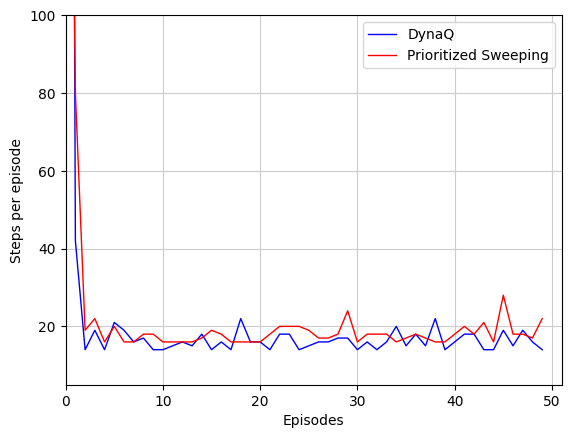

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(mean_steps_per_episode / runs, label='DynaQ', c='blue', linewidth=1)
ax.plot(mean_steps_per_episode2, label='Prioritized Sweeping', c='Red', linewidth=1)
ax.set_ylim([5, 100])
ax.set_xlim([0, 51])
ax.grid(c="#ccc")
ax.legend();
ax.set_xlabel("Episodes")
ax.set_ylabel("Steps per episode");